## Visualize articles by breach severity

Load data

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Import identified breaches
months = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
          'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
          'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def format_dates(date):
  month = date[:3]
  num = months[month]
  return date[3:] + '-' + num + '-' + '01'

breaches = pd.read_csv('../../data/breaches/breaches_information.csv', skiprows=range(1, 26))
breaches = breaches.rename(columns={'year   ': 'year'})
breaches['records lost'] = breaches['records lost'].str.replace(',', '')
breaches['records lost'] = pd.to_numeric(breaches['records lost'])
breaches = breaches.drop(columns=['Unnamed: 11'])
breaches['organisation_lower'] = breaches['organisation'].str.lower()
breaches = breaches.rename(columns={'date': 'breach_date'})
breaches['breach_date'] = breaches['breach_date'].str.replace(' ', '')
breaches['breach_date'] = pd.to_datetime(breaches['breach_date'].map(format_dates))

identified_breaches = breaches.groupby('data sensitivity').agg({
  'ID': 'count'
}).rename(columns={'ID': 'breach_count'}).reset_index()
identified_breaches['data sensitivity'] = identified_breaches['data sensitivity'].replace([1, 2, 3, 4, 5],
            ['1: Emails/Online', '2: SSN/Personal', '3: Credit Card', '4: Health Rec.', '5: Full'])
print(identified_breaches)

# Import articles about identified breach
identified_breach_articles = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)
# organisation, name, organisation_lower, and CompanyMentioned are equivalent.
# Other dropped columns are from breaches dataset and represent sources for that dataset.
# BreachMentioned contains only 'True', 'yes', and 'true'.
identified_breach_articles = identified_breach_articles.drop(columns=
        ['ID', 'organisation', 'alternative name', 'name', 'Unnamed: 0',
         'source name', '1st source link', '2nd source link', 'BreachMentioned', 'CompanyMentioned']
    )
identified_breach_articles = identified_breach_articles.rename(columns={'Unnamed: 0.1': 'id'})
print(identified_breach_articles.columns)
print(identified_breach_articles.shape)
#   ['id', 'records lost', 'year', 'breach_date', 'story', 'sector',
#    'method', 'interesting story', 'data sensitivity', 'displayed records',
#    'organisation_lower', 'domain', 'year founded', 'industry',
#    'size range', 'locality', 'country', 'linkedin url',
#    'current employee estimate', 'total employee estimate', 'article_date',
#    'Publication', 'Headline', 'URL']

Index(['organisation', 'alternative name', 'records lost', 'year',
       'breach_date', 'story', 'sector', 'method', 'interesting story',
       'data sensitivity', 'displayed records', 'source name',
       '1st source link', '2nd source link', 'ID', 'organisation_lower'],
      dtype='object')
Index(['id', 'records lost', 'year', 'breach_date', 'story', 'sector',
       'method', 'interesting story', 'data sensitivity', 'displayed records',
       'organisation_lower', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate', 'article_date',
       'Publication', 'Headline', 'URL'],
      dtype='object')
(1147, 24)


### Count breach articles, number of breaches reported per sensitivity

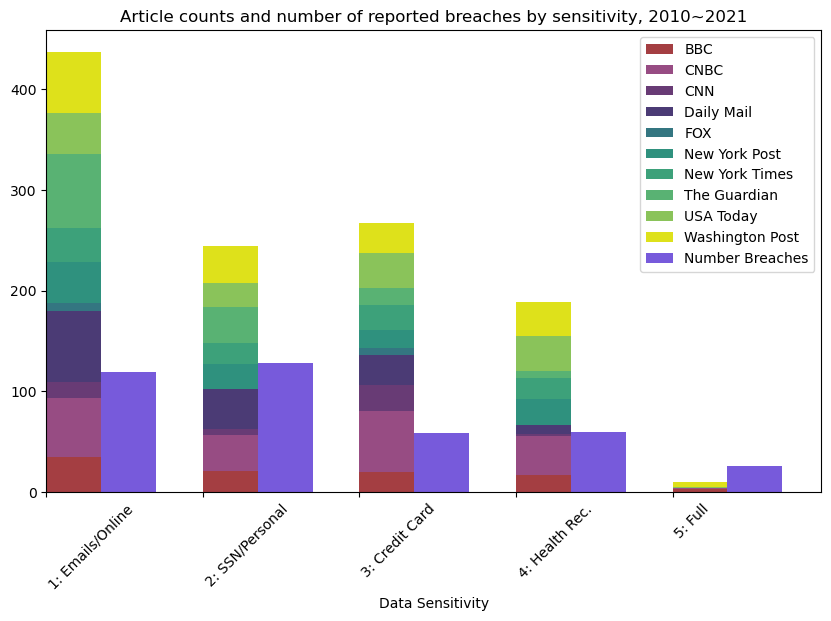

In [ ]:
# Count breach articles per sensitivity per publication company
joined_sens = identified_breach_articles.groupby(['Publication', 'data sensitivity']).agg({
  'URL': 'count'
}).rename(columns={'URL': 'article_count'}).reset_index()
joined_sens['data sensitivity'] = joined_sens['data sensitivity'].replace([1, 2, 3, 4, 5],
            ['1: Emails/Online', '2: SSN/Personal', '3: Credit Card', '4: Health Rec.', '5: Full'])

pubs = joined_sens['Publication'].unique()
x = pd.Series(joined_sens['data sensitivity'].unique()).sort_values()
y1 = joined_sens[joined_sens['Publication'] == pubs[0]].sort_values('data sensitivity')
y2 = joined_sens[joined_sens['Publication'] == pubs[1]].sort_values('data sensitivity')
y3 = joined_sens[joined_sens['Publication'] == pubs[2]].sort_values('data sensitivity')
y4 = joined_sens[joined_sens['Publication'] == pubs[3]].sort_values('data sensitivity')
y5 = joined_sens[joined_sens['Publication'] == pubs[4]].sort_values('data sensitivity')
y6 = joined_sens[joined_sens['Publication'] == pubs[5]].sort_values('data sensitivity')
y7 = joined_sens[joined_sens['Publication'] == pubs[6]].sort_values('data sensitivity')
y8 = joined_sens[joined_sens['Publication'] == pubs[7]].sort_values('data sensitivity')
y9 = joined_sens[joined_sens['Publication'] == pubs[8]].sort_values('data sensitivity')
y10 = joined_sens[joined_sens['Publication'] == pubs[9]].sort_values('data sensitivity')

# Add missing values
y1 = y1.reset_index().drop(columns=['index'])

y2 = y2.reset_index().drop(columns=['index'])

y3.loc[-1] = [pubs[2], '5: Full', 0]
y3.index = y3.index + 1
y3 = y3.reset_index().drop(columns=['index'])

y4.loc[-1] = [pubs[3], '5: Full', 0]
y4.index = y4.index + 1
y4 = y4.sort_values('data sensitivity').reset_index().drop(columns=['index'])

y5.loc[-1] = [pubs[4], '4: Health Rec.', 0]
y5.loc[-2] = [pubs[4], '2: SSN/Personal', 0]
y5.loc[-3] = [pubs[4], '5: Full', 0]
y5.index = y5.index + 3
y5 = y5.sort_values('data sensitivity').reset_index().drop(columns=['index'])

y6.loc[-1] = [pubs[5], '5: Full', 0]
y6.index = y6.index + 1
y6 = y6.sort_values('data sensitivity').reset_index().drop(columns=['index'])

y7.loc[-1] = [pubs[6], '5: Full', 0]
y7.index = y7.index + 1
y7 = y7.sort_values('data sensitivity').reset_index().drop(columns=['index'])

y8.loc[-1] = [pubs[7], '5: Full', 0]
y8.index = y8.index + 1
y8 = y8.sort_values('data sensitivity').reset_index().drop(columns=['index'])

y9 = y9.reset_index().drop(columns=['index'])

y10 = y10.reset_index().drop(columns=['index'])

# Plot
df = pd.DataFrame({
  'Sensitivity': x,
  pubs[0]: y1['article_count'],
  pubs[1]: y2['article_count'],
  pubs[2]: y3['article_count'],
  pubs[3]: y4['article_count'],
  pubs[4]: y5['article_count'],
  pubs[5]: y6['article_count'],
  pubs[6]: y7['article_count'],
  pubs[7]: y8['article_count'],
  pubs[8]: y9['article_count'],
  pubs[9]: y10['article_count']
})

fig, ax = plt.subplots()
df.plot(ax=ax, x='Sensitivity', kind='bar', stacked=True,
        figsize=(10, 6), position=0.0, width=0.35,
        color=['#A43E42', '#974C83', '#683B75', '#4B3B75', '#347681', '#2F917E', '#3DA17A', '#59B273', '#8AC35A', '#DEE11B'])
plt.legend().get_frame().set_alpha(0.5)

identified_breaches = identified_breaches.rename(columns={'breach_count': 'Number Breaches'})
identified_breaches.plot(ax=ax, x='data sensitivity', kind='bar', color='#775ADB',
        figsize=(10, 6), position=-1, width=0.35)
plt.xticks(rotation=45, ha='left')
plt.xlabel('Data Sensitivity')
plt.title('Article counts and number of reported breaches by sensitivity, 2010~2021')
plt.show()

Caption: The left bar of each pair shows the number of articles reported by the top 10 publishers, per sensitivity. The right bars show the number of reported breaches by sensitivity of the data breached. Articles tend to report on breaches for less sensitive information. Among breaches that exposed full information, the number of total breaches was higher than the total number of articles written about these breaches. This was not the case for all other sensitivities. Daily Mail and The Guardian appear to have the most variability among the data sensitivities, and both reported on less sensitive breaches far more than more sensitive ones.